## Pre Processing

In [1]:
import pandas as pd
import numpy as np
import os
os.listdir()

['README.md',
 'Sales.ipynb',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [2]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [4]:
data = pd.read_csv('train.csv')
data.head()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_20388\2616829868.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The training data is clean. There is no null value

In [6]:
train = data.merge(store, how='left', on='Store')
train.sample(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
434945,881,6,2014-06-07,2762,453,1,0,0,0,a,a,180.0,3.0,2008.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
748272,893,5,2013-08-30,6357,795,1,1,0,1,a,a,130.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
956949,1065,7,2013-02-24,0,0,0,0,0,0,a,a,1290.0,NaN,NaN,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
447080,751,2,2014-05-27,3418,492,1,0,0,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN


In [7]:
data.shape, train.shape

((1017209, 9), (1017209, 18))

In [8]:
test = pd.read_csv('test.csv').merge(store, how='left', on='Store')
test.sample(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
6421,6422,555,4,2015-09-10,1.0,0,0,1,d,a,1560.0,1.0,2014.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"
8471,8472,998,2,2015-09-08,1.0,0,0,1,a,a,780.0,9.0,2005.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
28882,28883,822,6,2015-08-15,1.0,0,0,0,a,c,410.0,11.0,2010.0,1,48.0,2010.0,"Mar,Jun,Sept,Dec"
11668,11669,700,5,2015-09-04,1.0,1,0,1,a,c,830.0,NaN,NaN,1,27.0,2013.0,"Jan,Apr,Jul,Oct"
453,454,585,4,2015-09-17,1.0,1,0,0,d,c,440.0,4.0,2014.0,0,NaN,NaN,NaN


In [9]:
for col in train.columns.tolist():
    if col not in test.columns:
        print(col)

Sales
Customers


There are 2 missing colums where we have to predict the values of sales

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
train.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [13]:
train.duplicated().sum()

0

Parsing the dates to the pd.datetime format

In [14]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
973731,7,5,2013-02-08,8091,879,1,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
27252,493,2,2015-07-07,6980,646,1,0,0,1,d,c,1150.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
441525,771,7,2014-06-01,0,0,0,0,0,0,a,a,20640.0,9.0,2007.0,0,NaN,NaN,NaN
461026,202,3,2014-05-14,4342,430,1,0,0,0,d,c,5140.0,5.0,2010.0,0,NaN,NaN,NaN
44826,227,7,2015-06-21,0,0,0,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
type(test.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
train.Date.min(), train.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [17]:
test.Date.min(), test.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sales', ylabel='Count'>

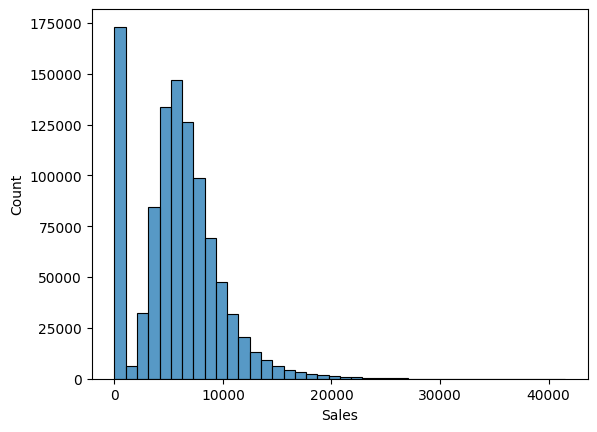

In [19]:
sns.histplot(data=train, x='Sales', bins= 40)

In [20]:
train.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [21]:
train[train.Open == 0].Sales.sum()

0

In [22]:
train= train[train.Open ==1].copy()
train.shape

(844392, 18)

<Axes: xlabel='Sales', ylabel='Count'>

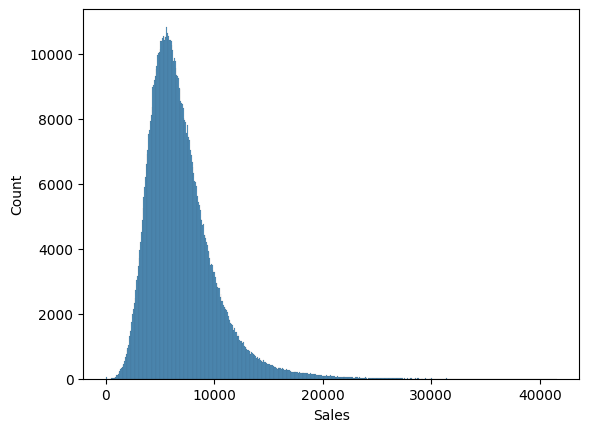

In [23]:
sns.histplot(data = train, x='Sales', kde= False)

Exploring some other columns 

Text(0.5, 1.0, 'Sales vs Customers')

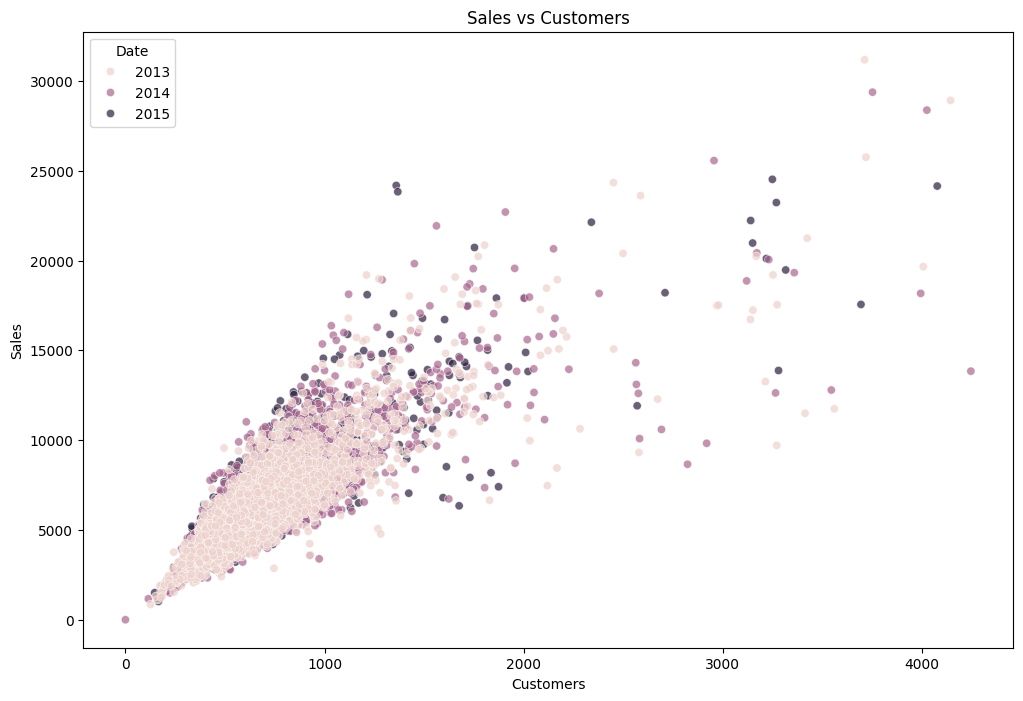

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train.sample(5000), x='Customers', y='Sales', hue=train.Date.dt.year, alpha = 0.7)
plt.title('Sales vs Customers')

Here exits a high co-relaiton between the customers and Sales but we can't use this data as we can't predict the Number of custormers on that specific day.

Text(0.5, 1.0, 'Stores vs Sales')

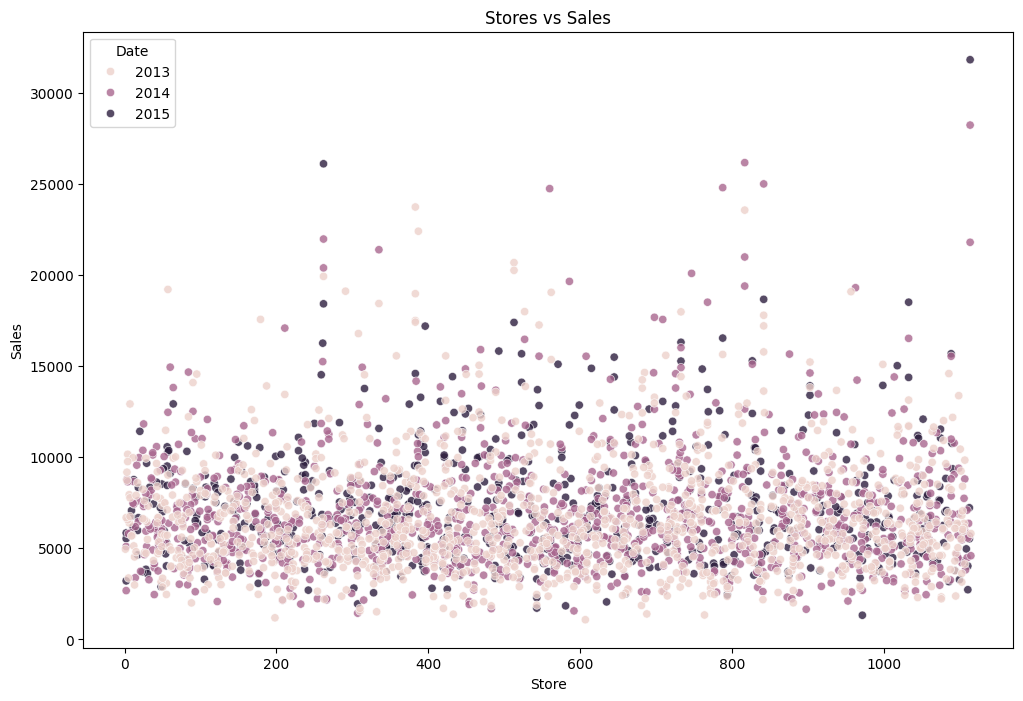

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = train.sample(3000), x='Store', y='Sales', hue=train.Date.dt.year, alpha=0.8)
plt.title('Stores vs Sales')

Text(0.5, 1.0, 'DaysOfWeek vs Sales')

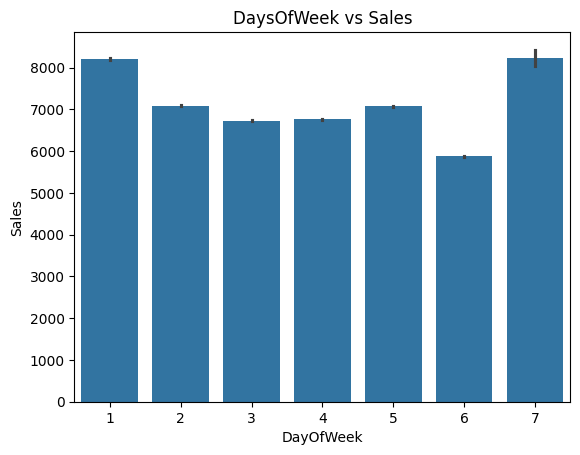

In [26]:
sns.barplot(data = train, x= 'DayOfWeek', y='Sales')
plt.title('DaysOfWeek vs Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

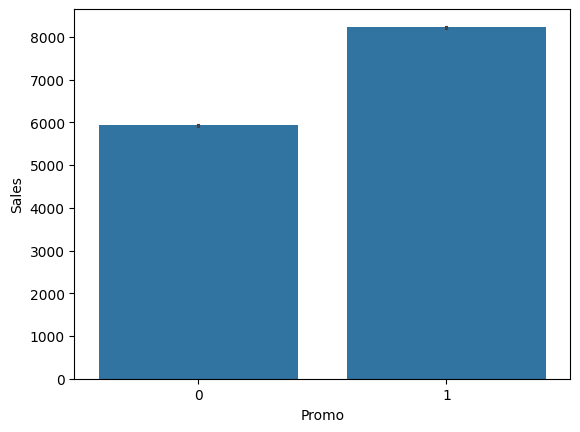

In [27]:
sns.barplot(data= train, x='Promo', y='Sales')

In [28]:
num_cols = train.describe().columns.tolist()
num_cols.remove('Open')
num_cols

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [29]:
train[num_cols].corr().Sales

Store                        0.007710
DayOfWeek                   -0.178736
Date                         0.062757
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
CompetitionOpenSinceYear     0.016101
Promo2                      -0.127596
Promo2SinceWeek              0.095311
Promo2SinceYear             -0.034713
Name: Sales, dtype: float64

<Axes: >

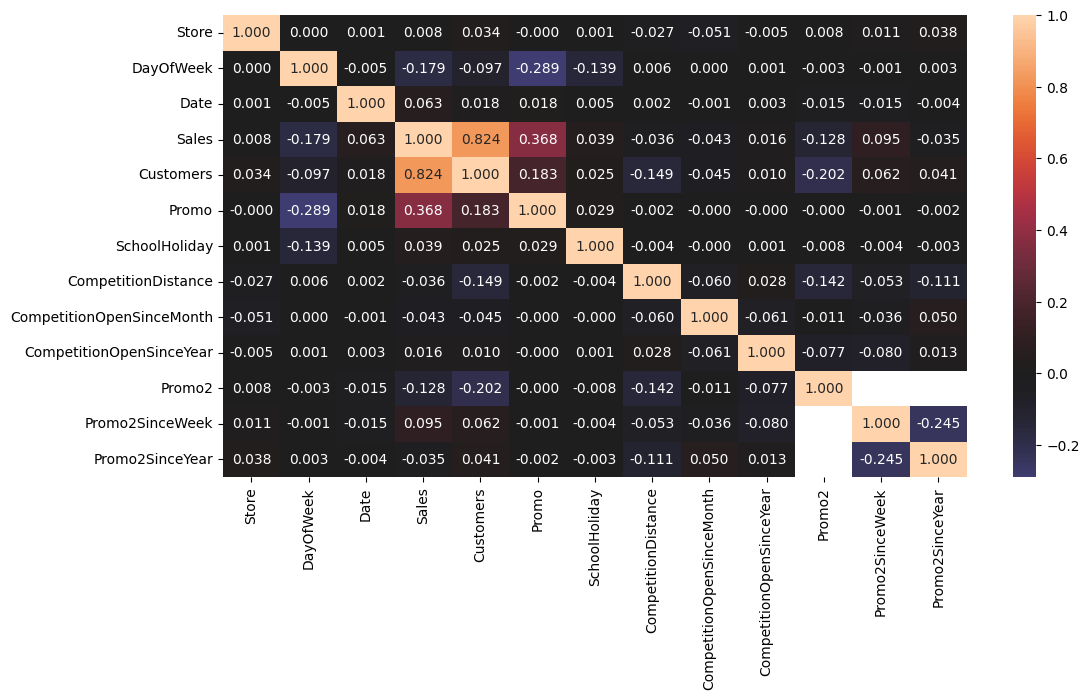

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(train[num_cols].corr(), cmap='icefire', annot=True, fmt='.3f', center=0)